### South African languages identification Hackathon 

In [288]:
#Import important libraries 
import pandas as pd
import numpy as np

import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import string

import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ramadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [289]:
df = pd.read_csv('train_set.csv')

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [291]:
df.head(n=30)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


### load test set 

In [292]:
df_test = pd.read_csv('test_set.csv')

In [293]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [294]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


### EDA

In [295]:
print(df['lang_id'].unique())

['xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr']


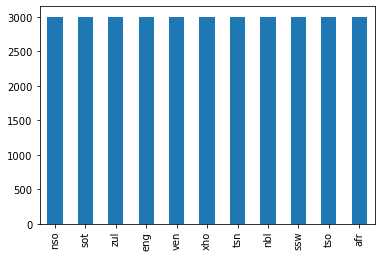

In [296]:
df['lang_id'].value_counts().plot(kind = 'bar')
plt.show()

Languages are evenly distributed, hence there is no need for resampling the data provided before training.

In [297]:
#Lower the case of the language text. For both training and testing dataframes
df['text'] = df['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()

In [298]:
df_test.head(n=20)

,index,text
0,1,"mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta.
5,6,"ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 am) 1495 final gems birthing...
7,8,ntjhafatso ya konteraka ya mosebetsi: etsa bon...
8,9,u-gems uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"so, on occasion, are statistics misused."


In [299]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [300]:
def remove_punctuation(message): #define function for removing punctuation in each row
    return ''.join([l for l in message if l not in string.punctuation])

In [301]:
df['text'] = df['text'].apply(remove_punctuation)
df_test['text'] = df_test['text'].apply(remove_punctuation)

In [302]:
    pattern = r'[0-9]+'
    df['text'] = df['text'].replace(to_replace = pattern, value = '', regex = True)
    df_test['text'] = df_test['text'].replace(to_replace = pattern, value = '', regex = True)

In [303]:
df_test.head(n=20)

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta
5,6,ke feela dilense tše hlakilego tša pono e tee ...
6,7,fn am final gems birthing optionszulutxtfn
7,8,ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8,9,ugems uhlinzeka ngezinzuzo zemithi yezifo ezin...
9,10,so on occasion are statistics misused


###  word tokenizer

In [304]:
from nltk.tokenize import word_tokenize

In [305]:
def tokenizer(text):
    tokens = word_tokenize(text)
    return tokens

In [306]:
#df['text'] = df['text'].apply(tokenizer)
#df_test['text'] = df_test['text'].apply(tokenizer)

In [307]:
df.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


#### Remove stop words using files imported from kaggle

In [308]:
#import files downloaded from kaggle

#Three South African languages were found on kaggle: Afrikaans, Sesutho and  IsiZulu

Af = pd.read_csv("af.txt")
So =pd.read_csv("so.txt")
zu = pd.read_csv("zu.txt")

Af_list = Af['die'].to_list()
Af_list.append('die')

So_list = So['oo'].to_list()
So_list.append('oo')

Zu_list = zu['ukuthi'].to_list()
Zu_list.append('ukuthi')

En_list = stopwords.words('english')

In [309]:
En_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [310]:
def StopWords_removal(df,Stop_words, lang_id):
    for i in range(len(df)):
        text = df.iloc[i,1]
        tokens = word_tokenize(text)
        for word in tokens:
            if word in Stop_words and df.iloc[i,0]:
                tokens.remove(word)
        clean_text = " ".join(tokens)
        df.iloc[i,1] = clean_text
    return df

In [311]:
StopWords_removal(df, En_list, 'eng')

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,province kwazulunatal department transport inv...
3,nso,netefatša gore ba file dilo ka moka tše le dum...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na ntse sa utlwe hore thabang ra...
32997,eng,closing date the submission completed tenders ...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [312]:
StopWords_removal(df, Zu_list, 'zul')
StopWords_removal(df, So_list, 'sot')
StopWords_removal(df, Af_list, 'afr')

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,province kwazulunatal department transport inv...
3,nso,netefatša gore ba file dilo moka tše le dumele...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi ntse sa utlwe hore thabang rata ...
32997,eng,closing date the submission completed tenders ...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [264]:
#def clean_stop(df,Stop_words):
#    for i in range(len(df)):
#        text = df.iloc[i,1]
#        tokens = word_tokenize(text)
#        for word in tokens:
#            if word in Stop_words:
#                tokens.remove(word)
#        clean_text = " ".join(tokens)
#        df.iloc[i,1] = clean_text
#    return df

In [265]:
#clean_stop(df_test,Zu_list)
#clean_stop(df_test,En_list)
#clean_stop(df_test,So_list)
#clean_stop(df_test,Af_list)

### Modelling

In [313]:
#Define the variables
X = df["text"]
y = df["lang_id"]

In [314]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [315]:
X_train.head()

12463    ge e le gore ga go le e tee ya tše tša godimo ...
9378     namhlanjesi sinehlelo lokubusa lentando yeneng...
9477     timhaka tinwana leti vekiweke kumbe iii mhaka ...
2142     laola tshebediso le maemo mehlodi basebedisi b...
23983    akukho mntu ofanelwe sisenzo somthetho okanye ...
Name: text, dtype: object

In [316]:
y_train.head()

12463    nso
9378     nbl
9477     tso
2142     sot
23983    xho
Name: lang_id, dtype: object

In [317]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_bow = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_bow = vectorizer.transform(X_test)

unseen_data = vectorizer.transform(df_test['text'])

In [318]:
#Import our model
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model_lr = LogisticRegression(max_iter = 1500)

# Fit the model on the training data
model_lr.fit(X_train_bow, y_train)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test_bow)

In [319]:
from sklearn.metrics import classification_report #import the necessary package
print('Classification Report')
print(classification_report(y_test, y_pred_lr))

Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       281
         eng       1.00      1.00      1.00       297
         nbl       0.99      0.98      0.98       327
         nso       1.00      0.99      0.99       322
         sot       1.00      1.00      1.00       307
         ssw       1.00      1.00      1.00       286
         tsn       0.99      1.00      0.99       297
         tso       1.00      1.00      1.00       253
         ven       1.00      1.00      1.00       322
         xho       0.99      0.99      0.99       313
         zul       0.97      0.99      0.98       295

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300



In [279]:
#Import SVC model from sklearn 
from sklearn.svm import SVC

SVC_model = SVC(kernel="linear", C=1.0, gamma=0.1)

SVC_model.fit(X_train_bow, y_train)

y_pred_svc = SVC_model.predict(X_test_bow)


In [280]:
print('Classification Report SVC')
print(classification_report(y_test, y_pred_svc))

Classification Report SVC
              precision    recall  f1-score   support

         afr       1.00      0.99      0.99       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.98      0.99       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      0.99      1.00       584
         tsn       0.99      0.99      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      0.99      0.99       609
         zul       0.95      0.99      0.97       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [320]:
Predicts = model_lr.predict(unseen_data)

In [321]:
unseen_data

<5682x136023 sparse matrix of type '<class 'numpy.int64'>'
	with 97111 stored elements in Compressed Sparse Row format>

In [322]:
len(df_test['index'])

5682

In [323]:
df_predict = pd.DataFrame()
df_predict['index'] = df_test['index']
df_predict['lang_id'] = Predicts

In [324]:
file_path = 'submission5.csv'
df_predict.to_csv(file_path, index=False)

In [325]:
f = pd.read_csv("submission5.csv")
f.head()

,index,lang_id
0,1,zul
1,2,nbl
2,3,zul
3,4,ssw
4,5,zul
